In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
!pip install better_profanity
from better_profanity import profanity
profanity.load_censor_words()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.5 MB/s eta 0:00:00


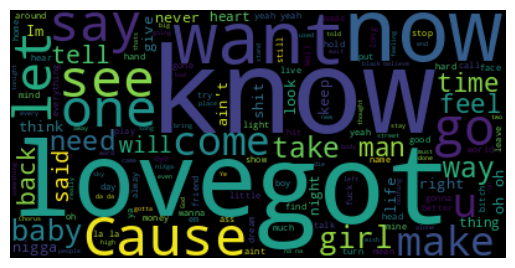

In [12]:
from wordcloud import WordCloud


# Open and read the text file
with open('/content/merged.txt', 'r') as file:
    text = file.read()

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the generated image using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [13]:
def filter(censored_text,generated_progression):
  input1 = int(input("Please enter 1 for filtered song or 2 for unfiltered text: "))
  if input1==1:
    print(censored_text)
  elif input1==2:
    print(generated_progression)
  else:
    print("please enter a valid choice 1 or 2 only !")

In [33]:
import random
#defaultdict is a dictionary-like object that provides a default value for keys that haven’t been set yet.
from collections import defaultdict
markov_chain=1

def build_markov_chain(text, n):
    #creates a new defaultdict where each value is an empty list. The keys in this dictionary are n-grams
    #(sequences of n words), and the values are lists of words that follow each n-gram in the input text.
    markov_chain = defaultdict(list)
    words = text.split()
    #For each n-gram in the input text, it adds
    # the word that comes after the n-gram to the list of possible next words for that n-gram.
    for i in range(len(words) - n):
        #creates an n-gram from the current word and the next n - 1 words.
        ngram = tuple(words[i:i + n - 1])
        # get the word that comes after the n-gram.
        next_word = words[i + n - 1]
        #adds the next_word to the list of words that follow the ngram in the markov_chain.
        markov_chain[ngram].append(next_word)

    return markov_chain


def generate_word_progression(markov_chain, seed_ngram, length=50):
    current_ngram = seed_ngram
    progression = list(current_ngram)

    while len(progression) < length:
        if current_ngram in markov_chain:
            next_word = random.choice(markov_chain[current_ngram])
            # print('markovvvvv next ')
            # print(markov_chain[current_ngram])
            progression.append(next_word)
            #The function updates the current n-gram to be the last n words of the generated word sequence.(shifting window)
            current_ngram = tuple(progression[-n + 1:])
        else:
            # If the current n-gram is not in the chain, choose a new random seed
            current_ngram = tuple(random.choice(list(markov_chain.keys())))

    return ' '.join(progression[:length])

if __name__ == "__main__":
    # Provide the path to your dataset of poems
    dataset_path = "/content/merged.txt"

    # Read the dataset
    with open(dataset_path, 'r', encoding='utf-8') as file:
        poems_dataset = file.read()

    # Set the value of n (order of the Markov chain)
    n = 1

    # Build the Markov chain
    markov_chain = build_markov_chain(poems_dataset, n)

    # Let the user define the first word or make a random choice
    user_defined_first_word = input("Enter the first word (press Enter for a random choice): ").strip()
    if user_defined_first_word:
        seed_ngram = (user_defined_first_word,) + tuple(random.choice(list(markov_chain.keys())))
    else:
        seed_ngram = tuple(random.choice(list(markov_chain.keys())))

    # Generate a word progression
    generated_progression = generate_word_progression(markov_chain, seed_ngram, length=100)
    censored_text = profanity.censor(generated_progression)
    filter(censored_text,generated_progression)



Enter the first word (press Enter for a random choice): 
Please enter 1 for filtered song or 2 for unfiltered text: 2
according that Listen talking first at You ho, how With lied like me to what rob out U wanna cannot to you, my will when a in one mama is know Here prove, a block looking the for Them so Or To down see pony give never And We I'm Shawnna- up girl Since small live Is without he The start is do I in Oh, this running weak should best life of ones was wanna (All of breath That her embarrassed heart that a my you you one Meet it I 2 Can and we cocked Our I changed


- Choose the next word using a weighted random choice

In [ ]:
import random
from collections import defaultdict, Counter

def build_markov_chain(text, n):
    markov_chain = defaultdict(list)
    words = text.split()

    for i in range(len(words) - n):
        ngram = tuple(words[i:i + n - 1])
        next_word = words[i + n - 1]
        markov_chain[ngram].append(next_word)

    return markov_chain

def generate_word_progression(markov_chain, seed_ngram, length=50):
    current_ngram = seed_ngram
    progression = list(current_ngram)

    while len(progression) < length:
        if current_ngram in markov_chain:
            # Use a Counter to count the frequency of each word
            word_counts = Counter(markov_chain[current_ngram])
            total_words = sum(word_counts.values())

            # Create a list of words and a corresponding list of probabilities
            words = list(word_counts.keys())
            probabilities = [word_counts[word] / total_words for word in words]

            # Choose the next word using a weighted random choice (frequency)
            next_word = random.choices(words, probabilities)[0]
           # next_word = words[probabilities.index(max(probabilities))]

            progression.append(next_word)
            current_ngram = tuple(progression[-n + 1:])
        else:
            # If the current n-gram is not in the chain, choose a new random seed
            current_ngram = tuple(random.choice(list(markov_chain.keys())))

    return ' '.join(progression[:length])

if __name__ == "__main__":
    # Provide the path to your dataset of poems
    dataset_path = "/content/merged.txt"

    # Read the dataset
    with open(dataset_path, 'r', encoding='utf-8') as file:
        poems_dataset = file.read()

    # Set the value of n (order of the Markov chain)
    n = 700

    # Build the Markov chain
    markov_chain = build_markov_chain(poems_dataset, n)

    # Let the user define the first word or make a random choice
    user_defined_first_word = input("Enter the first word (press Enter for a random choice): ").strip()
    if user_defined_first_word:
        seed_ngram = (user_defined_first_word,) + tuple(random.choice(list(markov_chain.keys())))
    else:
        seed_ngram = tuple(random.choice(list(markov_chain.keys())))

    # Generate a word progression
    generated_progression = generate_word_progression(markov_chain, seed_ngram, length=200)
    censored_text = profanity.censor(generated_progression)
    filter(censored_text,generated_progression)


Enter the first word (press Enter for a random choice): 
Please enter 1 for filtered song or 2 for unfiltered text: 2
sing it strong Let the echo decide if I was right or wrong Silvio Silver and gold Won't buy back the beat of a heart grown cold Silvio I gotta go Find out something only dead men know You must leave now, take what you need, you think will last But whatever you wish to keep, you better grab it fast Yonder stands your orphan with his gun Crying like a fire in the sun Look out the saints are comin’ through And it’s all over now, Baby Blue The highway is for gamblers, better use your sense Take what you have gathered from coincidence The empty-handed painter from your streets Is drawing crazy patterns on your sheets This sky, too, is folding under you And it’s all over now, Baby Blue All your seasick sailors, they are rowing home All your reindeer armies, are all going home The lover who just walked out your door Has taken all his blankets from the floor The carpet, too, is

Bayesian network


In [37]:
import random
from collections import defaultdict

class BayesianTextGenerator:
    def __init__(self, order):
        self.order = order
        self.network = defaultdict(list)
        self.word_count = defaultdict(int)

    def train(self, text):
        words = text.split()

        for i in range(len(words) - self.order):
            ngram = tuple(words[i:i + self.order])
            next_word = words[i + self.order]
            self.network[ngram].append(next_word)
            self.word_count[ngram] += 1

    def generate_text(self, seed_ngram, length=50):
        generated_text = list(seed_ngram)

        if seed_ngram not in self.network and len(seed_ngram) == 1:
            possible_starts = [ngram for ngram in self.network.keys() if ngram[0] == seed_ngram[0]]
            if possible_starts:
                seed_ngram = random.choice(possible_starts)
                generated_text = list(seed_ngram)
            else:
                raise ValueError(f"The entered word '{seed_ngram[0]}' is not in the network.")
        elif seed_ngram not in self.network:
            raise ValueError(f"The entered n-gram '{' '.join(seed_ngram)}' is not in the network.")

        for _ in range(length - self.order):
            current_ngram = tuple(generated_text[-self.order:])
            if current_ngram in self.network:
                next_word = self._sample_next_word(current_ngram)
                generated_text.append(next_word)
            else:
                break

        return ' '.join(generated_text)

    def _sample_next_word(self, ngram):
        possible_next_words = self.network[ngram]
        probabilities = [self.network[ngram].count(word) / len(self.network[ngram]) for word in possible_next_words]
        return random.choices(possible_next_words, weights=probabilities)[0]

if __name__ == "__main__":
    poems_dataset_path = "/content/merged.txt"

    with open(poems_dataset_path, 'r', encoding='utf-8') as file:
        poems_dataset = file.read()

    order = 6

    generator = BayesianTextGenerator(order)
    generator.train(poems_dataset)

    seed_word = input("Enter a seed word or press enter for a random choice: ")
    if not seed_word:
        seed_ngram = random.choice(list(generator.network.keys()))
    else:
        seed_ngram = (seed_word,)

    try:
        generated_text = generator.generate_text(seed_ngram, length=100)
        censored_text = profanity.censor(generated_text)
        filter(censored_text,generated_text)
    except ValueError as e:
        print(e)


Enter a seed word or press enter for a random choice: 
Please enter 1 for filtered song or 2 for unfiltered text: 2
Peelin and leavin killin and greivin Dearly departed erased deleted No prints no plates no face no trace Out of sight out of mind no court no case Sell his chain celebrate block parties second line Zulu ball bar SS fest jazz fest Mardi Gras Shotty bounce body rock now he dropped No he got family try tell the feds tell the cops Smell a rat comin back to the house to the spot Tap tap knock knock who is that chicka pow Trigger man hoody man tell the kids boogie man Pistol Pete ammomammal gun man blum blam ha


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load your lyrics dataset
with open('adele.txt', 'r') as f:
    data = f.read().lower().split('\n')

# Tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)

# Prepare the input and target data
X = []
y = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        X.append(sequence[:i])
        y.append(sequence[i])
X = pad_sequences(X, maxlen=10, padding='pre')
y = to_categorical(y, num_classes=len(tokenizer.word_index)+1)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=10))
model.add(LSTM(128))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
520/520 - 14s - loss: 5.8452 - 14s/epoch - 27ms/step
Epoch 2/100
520/520 - 11s - loss: 5.4899 - 11s/epoch - 20ms/step
Epoch 3/100
520/520 - 10s - loss: 5.2094 - 10s/epoch - 20ms/step
Epoch 4/100
520/520 - 10s - loss: 4.8545 - 10s/epoch - 19ms/step
Epoch 5/100
520/520 - 9s - loss: 4.4574 - 9s/epoch - 18ms/step
Epoch 6/100
520/520 - 10s - loss: 4.0684 - 10s/epoch - 20ms/step
Epoch 7/100
520/520 - 10s - loss: 3.7292 - 10s/epoch - 20ms/step
Epoch 8/100
520/520 - 10s - loss: 3.4273 - 10s/epoch - 19ms/step
Epoch 9/100
520/520 - 9s - loss: 3.1598 - 9s/epoch - 18ms/step
Epoch 10/100
520/520 - 11s - loss: 2.9213 - 11s/epoch - 20ms/step
Epoch 11/100
520/520 - 11s - loss: 2.7002 - 11s/epoch - 20ms/step
Epoch 12/100
520/520 - 11s - loss: 2.5049 - 11s/epoch - 20ms/step
Epoch 13/100
520/520 - 9s - loss: 2.3255 - 9s/epoch - 17ms/step
Epoch 14/100
520/520 - 11s - loss: 2.1618 - 11s/epoch - 21ms/step
Epoch 15/100
520/520 - 11s - loss: 2.0151 - 11s/epoch - 21ms/step
Epoch 16/100
520/520 - 10

In [25]:
import random

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Generate new lyrics
input_text = "hello"
for _ in range(100):  # Generate 100 words
    # Tokenize the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])[0]
    # Pad the input sequence
    input_sequence = pad_sequences([input_sequence], maxlen=X.shape[1])
    # Predict the next word
    preds = model.predict(input_sequence)[0]
    predicted_word_index = sample(preds)
    # Convert the predicted word index to a word
    predicted_word = tokenizer.index_word[predicted_word_index]
    # Add the predicted word to the input text
    input_text += ' ' + predicted_word
print(input_text)


1/1 [==============================] - 0s 36ms/step


<ipython-input-25-923d21d68123>:6: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature


1/1 [==============================] - 0s 23ms/step
hello as something in the other that walk that won't this enough up enough to be the light run and i'll make your body creep out right i do oh told you i'm in your left of you i take it don't let me down i can say i was her time and you're so alone i won't go on you when the time you've say my pain cuts every at in my blame is the core for the night cool i have made on the last that i say that it's in my blood for you they and myself i


# Text Generation Models Documentation

## Modified N-gram Markov Chain Model

### Introduction
The modified n-gram Markov chain model is designed to generate text based on observed sequences of n-grams.

### Overview
The project consists of Python code that implements a modified version of a Markov chain model utilizing n-grams. The modified model includes considerations for word selection based on observed frequencies.

### Code Structure
The project comprises the following main components:
- `generate_word_progression` function: Generates text using a modified Markov chain approach.
- `build_markov_chain` function: Constructs the Markov chain based on input text and n-gram order.

### Usage
The code can be utilized by following these steps:
1. Initialize the n-gram order and provide a dataset.
2. Build the Markov chain using the `build_markov_chain` function.
3. Generate text using the `generate_word_progression` function, considering modifications for word selection.

### Modification Details
- Utilizes a modification in the word selection process to consider observed frequencies for better text generation.
- Introduces weighted probability-based word selection compared to the original uniform random selection.

## Bayesian Text Generator

### Introduction
The Bayesian Text Generator uses a probabilistic approach based on observed frequencies of n-grams to generate text.

### Overview
This project implements a Python-based Bayesian approach for text generation using n-grams and frequency-based probabilities.

### Code Structure
The primary components of the project include:
- `BayesianTextGenerator` class: Responsible for training and generating text using Bayesian inference.
- `train` method: Trains the generator based on observed n-grams and their frequencies.
- `generate_text` method: Generates text using the trained model and Bayesian probabilities.

### Usage
To use the Bayesian Text Generator:
1. Instantiate the `BayesianTextGenerator` with a specified order.
2. Train the generator using a dataset.
3. Generate text by specifying a seed n-gram or word.

### Key Features
- Utilizes Bayesian inference to model the probability of next words based on observed n-grams and their frequencies.
- Allows for generation of text reflecting the observed patterns and frequencies in the training data.

## Conclusion
Both models offer unique approaches to text generation, with the modified n-gram Markov chain focusing on weighted probabilities for word selection and the Bayesian Text Generator utilizing Bayesian inference for probabilistic text generation.

